In [132]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.express as px

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix

In [153]:
df= pd.read_csv('Epileptic Seizure Recognition.csv')

In [154]:
df.drop('Unnamed', axis=1, inplace=True)
# mapping name of coloumn to be understanding in visualization

class_labels = {

    5: 'eyes open',

    4: 'eyes closed',

    3: 'tumor region identified',

    2: 'EEG from tumor area',

    1: 'seizure activity'

}

df['y'] = df['y'].map(class_labels)

df['y'].head()

0         eyes closed
1    seizure activity
2           eyes open
3           eyes open
4           eyes open
Name: y, dtype: object

In [155]:
df['y'].value_counts()

y
eyes closed                2300
seizure activity           2300
eyes open                  2300
EEG from tumor area        2300
tumor region identified    2300
Name: count, dtype: int64

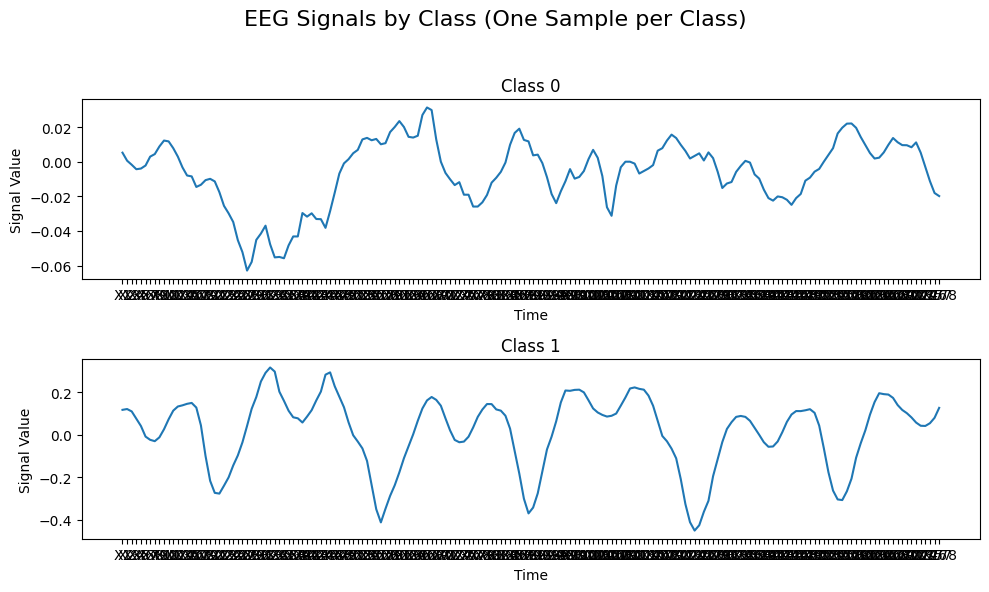

In [176]:
import matplotlib.pyplot as plt

# Get unique classes
unique_classes = df['y'].unique()

# Create subplots for each class with 1 column (1 sample per class)
fig, axes = plt.subplots(nrows=len(unique_classes), ncols=1, figsize=(10, 3 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize=16)

# Iterate over each class
for i, class_label in enumerate(unique_classes):
    class_data = df[df['y'] == class_label]
    
    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1).drop(columns='y')  # Exclude the 'y' column
    
    # Plot the sample
    axes[i].plot(random_sample.iloc[0, :])  # Now it plots only the numeric data
    axes[i].set_title(f'Class {class_label}', fontsize=12)
    axes[i].set_ylabel('Signal Value')
    axes[i].set_xlabel('Time')

# Adjust layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title

# Show the plot
plt.show()


In [157]:
# convert target column from object data type to numerical data type

dic = {'seizure activity': 1,

       'eyes open': 0 ,

       'eyes closed': 0,

       'tumor region identified': 0,

       'EEG from tumor area': 0}



df['y'] = df['y'].map(dic)

In [158]:
print(df['y'].value_counts())

df.head()

y
0    9200
1    2300
Name: count, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df` and the label column is named 'y'
label_col = 'y'

# Separate the label column from the features
labels = df[label_col]    
features = df.drop(columns=[label_col])

# Normalize the feature columns to be in the range [0, 1]
features_normalized = (features - features.min()) / (features.max() - features.min())

# Combine the normalized features with the label column
df = pd.concat([features_normalized, labels], axis=1)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0.553717,0.571107,0.584371,0.598207,0.599275,0.526728,0.486466,0.462484,0.464883,0.467297,...,0.507684,0.554390,0.544073,0.521051,0.489858,0.454331,0.434953,0.435612,0.474893,0
1,0.624123,0.625176,0.620328,0.629447,0.637957,0.579905,0.551431,0.535948,0.536146,0.536280,...,0.557355,0.603836,0.603850,0.593542,0.562101,0.528396,0.505486,0.495495,0.522970,1
2,0.506872,0.506618,0.506229,0.522997,0.531581,0.481668,0.457592,0.445752,0.451505,0.452989,...,0.527991,0.578064,0.570753,0.551440,0.515143,0.479717,0.456113,0.448331,0.478900,0
3,0.486396,0.489158,0.492356,0.507087,0.514355,0.465155,0.445991,0.438693,0.450990,0.456822,...,0.489846,0.534612,0.527524,0.521051,0.494860,0.467417,0.446447,0.439322,0.471154,0
4,0.513324,0.499296,0.491789,0.504194,0.517679,0.478310,0.468162,0.464837,0.467970,0.461932,...,0.513447,0.559485,0.550490,0.535296,0.507085,0.470557,0.443574,0.434022,0.469017,0


In [159]:
import pandas as pd

# Assuming your DataFrame is named `df` and the label column is named 'y'
label_col = 'y'

# Separate the label column from the features
labels = df[label_col]    
features = df.drop(columns=[label_col])

# Normalize the feature columns to be in the range [0, 1]
features_normalized = features/features.max()

# Combine the normalized features with the label column
df = pd.concat([features_normalized, labels], axis=1)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0.078216,0.110917,0.134944,0.138337,0.126482,0.068833,0.026869,-0.004397,-0.016121,-0.018564,...,-0.009567,-0.010190,-0.023503,-0.053621,-0.059435,-0.064862,-0.056668,-0.040547,-0.026632,0
1,0.223638,0.223001,0.209782,0.205335,0.210804,0.173458,0.149976,0.132877,0.119199,0.113337,...,0.092290,0.101902,0.110690,0.105850,0.090594,0.079673,0.075232,0.069858,0.067363,1
2,-0.018540,-0.022767,-0.027696,-0.022953,-0.021080,-0.019824,-0.027846,-0.035662,-0.041524,-0.045921,...,0.032077,0.043478,0.036391,0.013231,-0.006924,-0.015322,-0.017098,-0.017098,-0.018799,0
3,-0.060834,-0.058961,-0.056570,-0.057072,-0.058630,-0.052313,-0.049829,-0.048852,-0.042501,-0.038593,...,-0.046145,-0.055027,-0.060652,-0.053621,-0.049048,-0.039326,-0.035173,-0.033708,-0.033943,0
4,-0.005214,-0.037945,-0.057749,-0.063275,-0.051383,-0.026432,-0.007816,0.000000,-0.010259,-0.028823,...,0.002251,0.001359,-0.009098,-0.022284,-0.023658,-0.033197,-0.040547,-0.043478,-0.038120,0


In [160]:
df1= df.copy()

df2= df.copy()

# Separate features and labels

X = df1.drop('y', axis=1).values  # Drop the label column 'y'

y = df1['y'].values



# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X169', 'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178'],
      dtype='object', length=178)


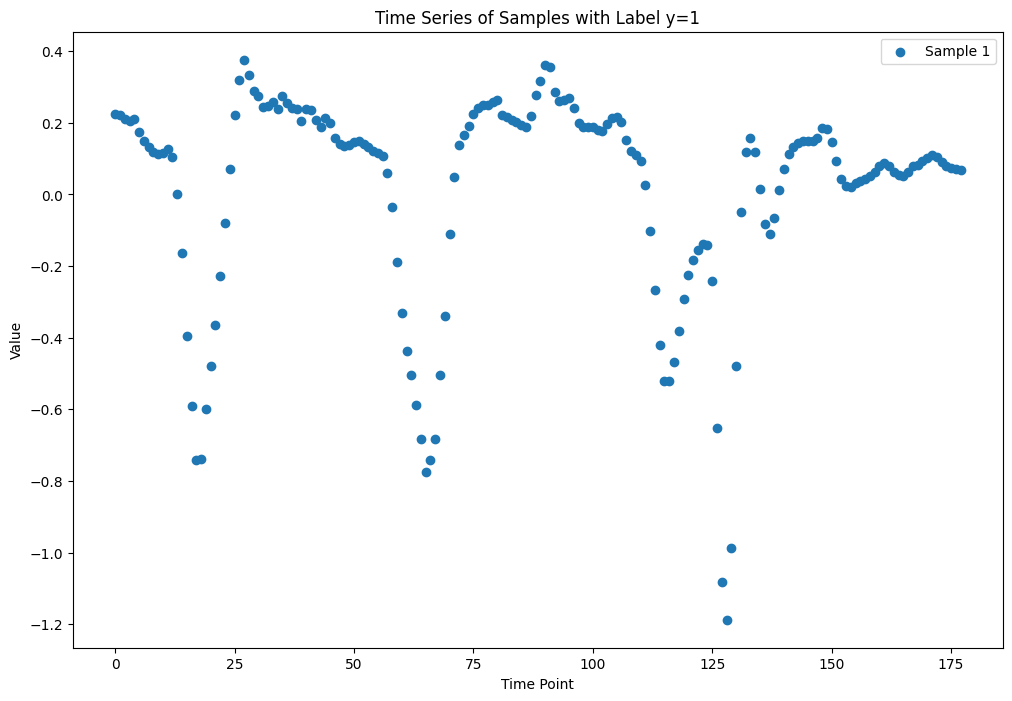

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for samples where y == 1
df_positive = df[df['y'] == 1]

# Select a subset of samples to plot (e.g., first 5 samples with y = 1)
samples_to_plot = df_positive.head(1)

# Plot each sample as a time series
plt.figure(figsize=(12, 8))

for idx, row in samples_to_plot.iterrows():
    print(row.index[:-1])
    plt.scatter(range(178), row.values[:-1], label=f'Sample {idx}')  # Exclude 'y' column
    plt.xlabel('Time Point')
    plt.ylabel('Value')
    plt.title('Time Series of Samples with Label y=1')

plt.legend()
# plt.grid()
plt.show()


In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for samples where y == 0
df_negative = df[df['y'] == 0]

# Drop the 'y' column from the filtered DataFrame
df_negativef = df_negative.drop('y', axis=1)

# Select a subset of 10 samples (first 10 samples where y = 0)
samples_to_plot = df_negativef.head(10).values

# Print the shape of the selected samples
print(samples_to_plot.shape)


(10, 178)


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X169', 'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178'],
      dtype='object', length=178)


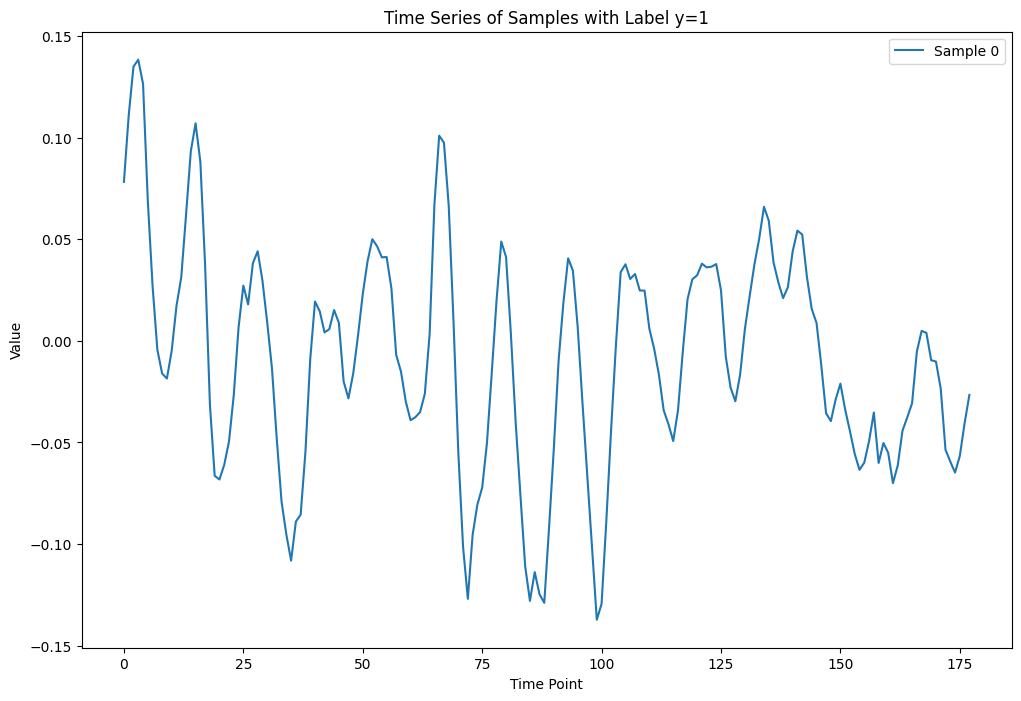

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for samples where y == 1
df_positive = df[df['y'] == 0]

# Select a subset of samples to plot (e.g., first 5 samples with y = 1)
samples_to_plot = df_positive.head(1)

# Plot each sample as a time series
plt.figure(figsize=(12, 8))

for idx, row in samples_to_plot.iterrows():
    print(row.index[:-1])
    plt.plot(range(178), row.values[:-1], label=f'Sample {idx}')  # Exclude 'y' column
    plt.xlabel('Time Point')
    plt.ylabel('Value')
    plt.title('Time Series of Samples with Label y=1')

plt.legend()
# plt.grid()
plt.show()


In [164]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(input_dim, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.2)
        
        # Hidden layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc4 = nn.Linear(64, 32)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)
        
        # Output layer
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        # Input layer with ELU activation, BatchNorm, and Dropout
        x = F.elu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        
        # Hidden layers with ELU activation, BatchNorm, and Dropout
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        
        x = F.elu(self.fc4(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        
        # Output layer with sigmoid activation for binary classification
        x = torch.sigmoid(self.output(x))
        
        return x

# Model instantiation
input_dim = X_train.shape[1]  # Assuming X_train is available
model = ANNModel(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from sklearn.model_selection import train_test_split


# def calculate_output_size(input_length):
#     # Conv1
#     output_length = (input_length - 5 + 2) // 1 + 1  # Kernel size 5, padding 2
#     # Pool1
#     output_length //= 2  # Kernel size 2, stride 2
#     # Conv2
#     output_length = (output_length - 5 + 2) // 1 + 1  # Kernel size 5, padding 2
#     # Pool2
#     output_length //= 2  # Kernel size 2, stride 2
#     return output_length

# input_length = 256  # Change this to match your input data length
# output_length = calculate_output_size(input_length)





# class CNNModel(nn.Module):
#     def __init__(self, num_classes=1, input_length=256):
#         super(CNNModel, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
#         output_length = calculate_output_size(input_length)  # Calculate the output length
#         self.fc1 = nn.Linear(64 * (output_length), 128)  # Adjusted to match output from conv layers
#         self.fc2 = nn.Linear(128, num_classes)

        
#     def forward(self, x):
#         x = x.unsqueeze(1)  # Add channel dimension
#         x = F.relu(self.conv1(x))
#         x = self.pool(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
#         x = x.view(x.size(0), -1)  # Flatten
#         x = F.relu(self.fc1(x))
#         x = torch.sigmoid(self.fc2(x))  # Output layer
#         return x

# # Model instantiation
# input_length = 256  # Change this to match your input data length
# model = CNNModel(num_classes=1, input_length=input_length)


In [165]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.75, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        # Convert inputs to probabilities
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        # Apply focal loss modulation
        pt = torch.exp(-BCE_loss)  # pt is the predicted probability
        focal_loss = (self.alpha * (1 - pt) ** self.gamma * BCE_loss).mean()
        return focal_loss

# Usage example
criterion = FocalLoss(alpha=0.75, gamma=2)

In [96]:
# Define training parameters
num_epochs = 20
batch_size = 64  # Adjust as needed
best_val_loss = float('inf')



# Convert training data to PyTorch tensors
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32)



# Create a DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


val_data = torch.tensor(X_test, dtype=torch.float32)
val_labels = torch.tensor(y_test, dtype=torch.float32)
val_dataset = torch.utils.data.TensorDataset(val_data, val_labels)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze()  # Remove extra dimension if necessary
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to compute gradients during validation
        for inputs, labels in val_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            # Calculate accuracy
            predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        if val_loss < best_val_loss:
            best_val_loss = val_loss  # Update best validation loss
            print("Validation loss improved, saving model weights...")
            torch.save(model.state_dict(), 'best_model.pth') 
        
    # Print epoch results
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {100 * correct / total:.2f}%")

print("Training complete.")


Epoch [1/20], Loss: 0.3030
Validation loss improved, saving model weights...
Epoch [1/20], Train Loss: 0.3030, Val Loss: 2.2489, Val Accuracy: 20.22%
Epoch [2/20], Loss: 0.1594
Validation loss improved, saving model weights...
Epoch [2/20], Train Loss: 0.1594, Val Loss: 0.5005, Val Accuracy: 80.57%
Epoch [3/20], Loss: 0.1273
Validation loss improved, saving model weights...
Epoch [3/20], Train Loss: 0.1273, Val Loss: 0.1663, Val Accuracy: 95.04%
Epoch [4/20], Loss: 0.1147
Epoch [4/20], Train Loss: 0.1147, Val Loss: 0.8748, Val Accuracy: 39.52%
Epoch [5/20], Loss: 0.1147
Epoch [5/20], Train Loss: 0.1147, Val Loss: 0.3785, Val Accuracy: 88.48%
Epoch [6/20], Loss: 0.1019
Validation loss improved, saving model weights...
Epoch [6/20], Train Loss: 0.1019, Val Loss: 0.1000, Val Accuracy: 96.70%
Epoch [7/20], Loss: 0.0922
Epoch [7/20], Train Loss: 0.0922, Val Loss: 0.9459, Val Accuracy: 40.78%
Epoch [8/20], Loss: 0.0920
Epoch [8/20], Train Loss: 0.0920, Val Loss: 0.2158, Val Accuracy: 94.57%


Validation Loss: 0.1185, Accuracy: 96.70%


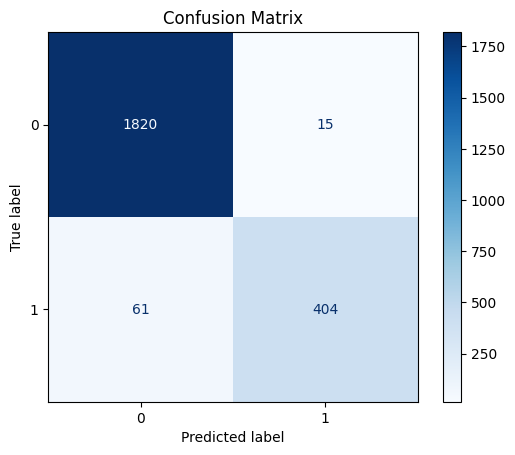

In [166]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.eval() 

# Initialize variables for evaluation
val_loss = 0.0
all_predictions = []
all_labels = []
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in val_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        
        # Collect predictions and labels
        predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())
        
        # Calculate accuracy
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Convert lists to numpy arrays for confusion matrix
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Print final evaluation results
average_val_loss = val_loss / len(val_loader)
accuracy = 100 * correct / total
print(f"Validation Loss: {average_val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [177]:
X_ch=pd.read_csv('smoothed_values.csv').values

(356, 1)
[[ 6.42857143e-02]
 [ 9.28571429e-02]
 [ 9.28571429e-02]
 [ 1.28571429e-01]
 [ 1.35714286e-01]
 [ 2.07142857e-01]
 [ 2.14285714e-01]
 [ 1.42857143e-01]
 [ 1.35714286e-01]
 [ 9.28571429e-02]
 [ 7.85714286e-02]
 [ 7.85714286e-02]
 [ 7.14285714e-02]
 [ 9.28571429e-02]
 [ 7.14285714e-02]
 [ 7.14285714e-03]
 [-5.55111512e-17]
 [ 1.42857143e-02]
 [ 8.57142857e-02]
 [ 2.28571429e-01]
 [ 2.85714286e-01]
 [ 2.14285714e-01]
 [ 3.00000000e-01]
 [ 4.00000000e-01]
 [ 4.07142857e-01]
 [ 4.21428571e-01]
 [ 4.21428571e-01]
 [ 4.21428571e-01]
 [ 3.42857143e-01]
 [ 3.64285714e-01]
 [ 3.35714286e-01]
 [ 3.35714286e-01]
 [ 3.21428571e-01]
 [ 2.50000000e-01]
 [ 3.14285714e-01]
 [ 2.78571429e-01]
 [ 1.64285714e-01]
 [ 2.14285714e-01]
 [ 1.57142857e-01]
 [ 1.50000000e-01]
 [ 1.71428571e-01]
 [ 1.64285714e-01]
 [ 1.64285714e-01]
 [ 1.92857143e-01]
 [ 1.57142857e-01]
 [ 1.78571429e-01]
 [ 1.92857143e-01]
 [ 1.57142857e-01]
 [ 1.64285714e-01]
 [ 2.42857143e-01]
 [ 3.64285714e-01]
 [ 4.50000000e-01]
 [ 

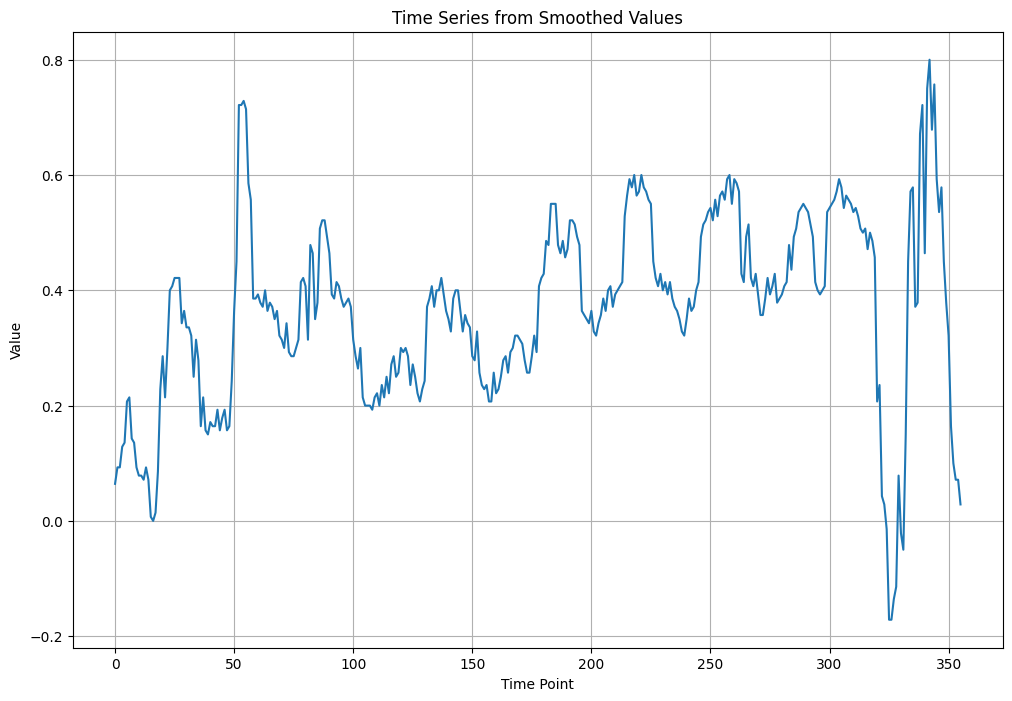

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

X_ch = pd.read_csv('smoothed_values.csv', header=None).values  # Load without headers

# Check the shape and content of X_ch
print(X_ch.shape)  # Should print (1, 178) if there's one row
print(X_ch)        # Print the values for debugging

# If it's a single row, flatten it to 1D
X_ch_flat = X_ch.flatten()  # This will convert it to a 1D array if it's originally 2D

# Plot the values directly without specifying x-values
plt.figure(figsize=(12, 8))
plt.plot(X_ch_flat)  # Plot the flattened values

plt.xlabel('Time Point')  # Add x-axis label
plt.ylabel('Value')       # Add y-axis label
plt.title('Time Series from Smoothed Values')  # Title of the plot
plt.grid()               # Add grid lines for better readability
plt.show()     

In [179]:
# indices = np.linspace(0, len(X_ch_flat) - 1, 178, dtype=int)

# Use the indices to sample from the original array
# sampled_points = X_ch_flat[indices]
# sampled_points = sampled_points[:, np.newaxis]

# print(sampled_points.shape) 
# print(sampled_points)

# print(sampled_points.reshape(-1,1).shape)

# Reshape sampled_points to (1, 178)
# sampled_points = sampled_points.reshape(1, 178)

# Pass through the model
# plt.scatter(x=range(178),y=sampled_points.reshape(178,1))  # Plot the flattened values

# plt.xlabel('Time Point')  # Add x-axis label
# plt.ylabel('Value')       # Add y-axis label
# plt.title('Time Series from Smoothed Values')  # Title of the plot
# plt.grid()               # Add grid lines for better readability
# plt.show()     


# sampled_points=np.random.rand((178,1))
outputs = model(torch.tensor(X_ch, dtype=torch.float32)).squeeze()

print("Predicted probability of the positive class:", outputs)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (356x1 and 178x256)

In [173]:

poi=np.random.randn(5,178)
# indices = np.linspace(0, len(X_ch_flat) - 1, 178, dtype=int)
# indices = np.linspace(0, len(poi) - 1, 178, dtype=int)

# print(indices)
# # Use the indices to sample from the original array
# # sampled_points = X_ch_flat[indices]

# sampled_points = poi[indices]

sampled_points = sampled_points[:, np.newaxis]

# print(sampled_points.shape) 
# print(sampled_points)

# print(sampled_points.reshape(-1,1).shape)

# Reshape sampled_points to (1, 178)

# sampled_points = sampled_points.reshape(5, 178)
# sampled_points=np.random.rand(1,178)

# Pass through the model
# plt.scatter(x=range(178),y=sampled_points.reshape(178,1))  # Plot the flattened values

# plt.xlabel('Time Point')  # Add x-axis label
# plt.ylabel('Value')       # Add y-axis label
# plt.title('Time Series from Smoothed Values')  # Title of the plot
# plt.grid()               # Add grid lines for better readability
# plt.show()     


print(poi.shape)

poi=samples_to_plot
# sampled_points=np.random.rand((1,178))
outputs = model(torch.tensor(poi, dtype=torch.float32))

print("Predicted probability of the positive class:", outputs)

(5, 178)


ValueError: could not determine the shape of object type 'DataFrame'

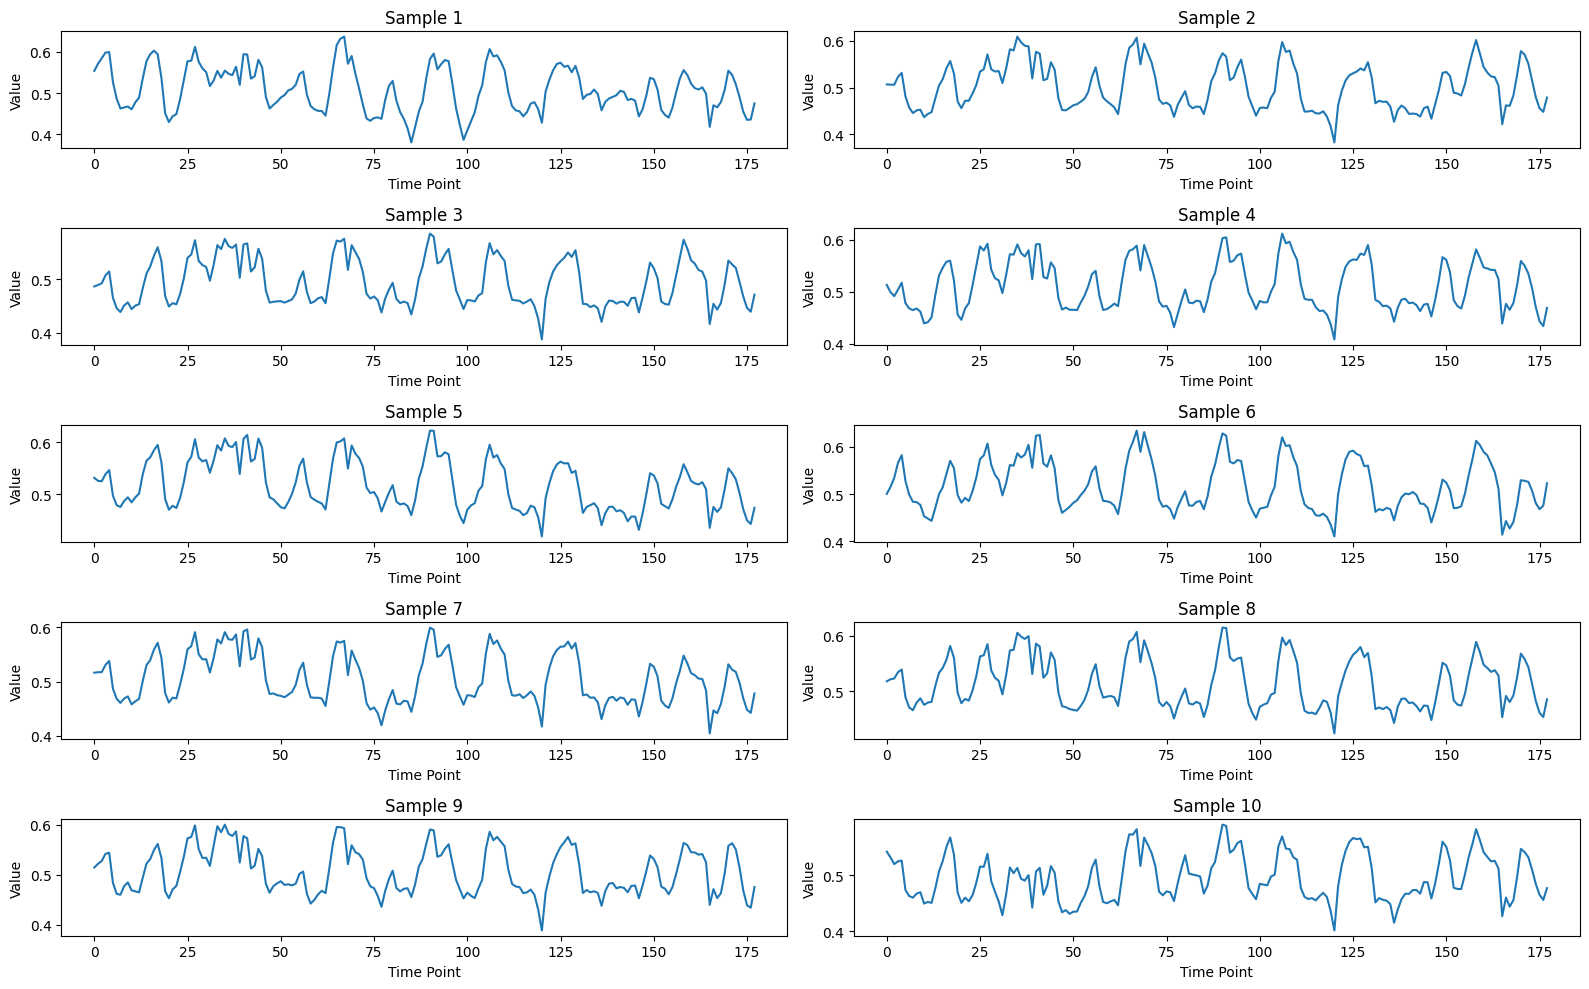

In [122]:
plt.figure(figsize=(16, 10))  # Adjust the figure size if necessary

for i, sample in enumerate(samples_to_plot):
    plt.subplot(5, 2, i + 1)  # 2 rows, 5 columns
    plt.plot(range(178), sample)  # Plot the time series for the current sample
    plt.title(f'Sample {i + 1}')  # Title for each subplot
    plt.xlabel('Time Point')
    plt.ylabel('Value')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()